In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### For training it with RandomForest Regressor, I used 10000 rows

In [56]:
#df_train = pd.read_csv("../input/30-days-of-ml/train.csv", nrows=10000)
df_train = pd.read_csv("../input/30-days-of-ml/train.csv")
df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
test_id = df_test.id

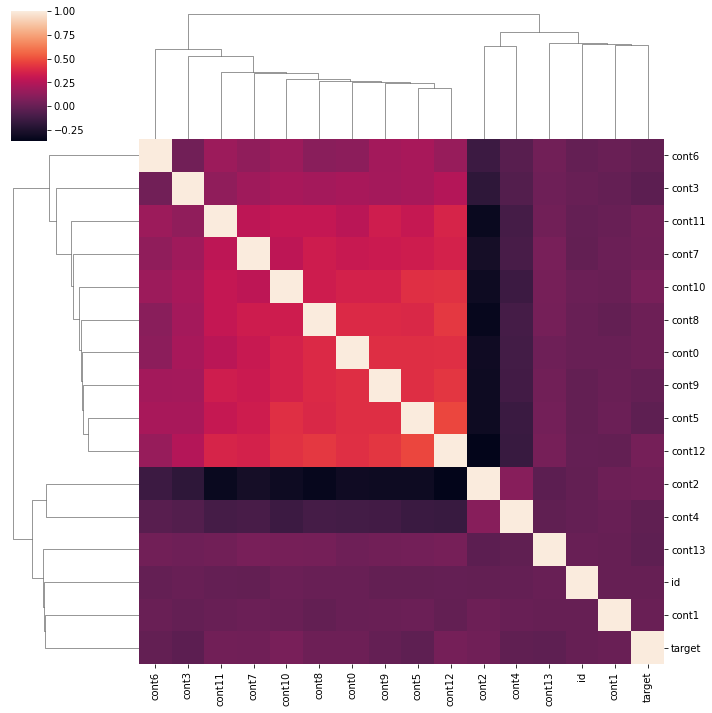

In [43]:
sns.clustermap(df_train.corr())

In [57]:
features = list(df_train.columns)
features.remove('target')

## *Encoding the categorical features*

In [58]:
encoded_df = pd.get_dummies(df_train[features])
encoded_dft = pd.get_dummies(df_test[features])

In [60]:
test_data = encoded_dft

In [61]:
X = encoded_df
Y = df_train['target']

## *Splitting the data into train-test split*

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.02, random_state = 42)


## *Hyperparameter tuning using RandomizedSearch CV*

### Feel free to experiment with the parameters yourself 

In [48]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [63]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [50]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [51]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 11.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

## *Print the best parameters*

In [52]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': False}  



## *Using the best parameters*

In [64]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 6, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 120, bootstrap=False) 
randmf.fit( X_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=120, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=6)

In [65]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
"predicted_prob": randmf.predict( 
( X_test ) ) } ) 
y_pred_rf1


,actual,predicted_prob
4941,9.374259,8.046294
51775,8.991401,8.131618
115253,8.514022,8.294643
299321,8.468016,8.110676
173570,7.129968,8.247689
...,...,...
144728,7.291536,7.955970
265223,8.392270,8.230947
270329,7.090353,8.331473
251293,8.518772,8.325587


In [66]:
submission = pd.DataFrame({"id": test_id, "target":randmf.predict(test_data)})
submission.to_csv('submission.csv', index=False)